###Introduction

A Recommendation System is a filtration program whose prime goal is to predict a user's "rating" or "preference" towards a domain-specific item or item. In our case, this domain-specific item is a movie. Therefore, the main focus of our recommendation system is to filter and predict only those movies which a user would prefer given some data about the user rating on movie.

####Recommendation Systems are vital for several reasons:

Recommendation Systems let users have personalized suggestions that are in tune with the user's preferences, hence it is guaranteed that users will find that content and products are relevant and interesting to them.

By offering personalized suggestions, users will be more satisfied and will tend to get more involved with the service. E-commerce sites increase their sales by recommending product suggestions to customers, due to which they end up finding and buying products that were not on their list before.

These recommendation systems, in the present huge digital landscape, facilitate the navigation of users through the ocean of available variety for anything one may look for.

Recommendation systems expose users to new and diverse content, extending their horizon by exposing them to items that they might have otherwise overlooked or never come across.

#Step 1. Import necessary libraries

In [2]:
!pip install scikit-surprise
!pip install scikit-learn
import pandas as pd
import numpy as np
from surprise import SVD, KNNBasic, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split, cross_validate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357283 sha256=d44b8fdf34b4add355affd55afd2fa9ff5383006437b2ec5026dd66a288cb284
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


#Step 2. Loading the file

In [3]:
# Load the ratings dataset
file_path = 'rating.csv'
ratings_df = pd.read_csv(file_path)

print("\nFirst 5 rows of the dataset:")
print(ratings_df.head())



First 5 rows of the dataset:
   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40


It loads a ratings dataset (rating.csv) into a pandas DataFrame.
Displays the first 5 rows to inspect the structure and content of the dataset.
Our data consist of UserId where we have users rating(rating) different movies(movieID) on the scale of 1-5 and timestamp showing when these movies were rated.

#Step 3. Data Pre-processing

Here, we clean the dataset by:

1.Dropping irrelevant columns (timestamp).

2.Checking for missing values and duplicates .





In [4]:
# Display initial dataset information
print("Initial Dataset Information:")
print(ratings_df.info())

Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507425 entries, 0 to 4507424
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 137.6+ MB
None


It shows we have 20000262 records of user rating movies.

In [5]:
# Limit the dataset to the first 100,000 rows
ratings_df = ratings_df.head(100000)


As the sytem was crashing with such a huge records , we have Trim the dataset to the first 100,000 rows to reduce computational complexity, possibly for faster experimentation.

In [6]:
print(ratings_df.shape)

(100000, 4)


It prints the shape of the dataset to confirm the number of rows and columns after trimming.

In [7]:
#Check the datatypes
ratings_df.dtypes

,0
userId,int64
movieId,int64
rating,float64
timestamp,object


It displays the data types of each column in the ratings_df DataFrame to ensure compatibility with further processing steps, such as numerical operations for ratings.

In [8]:
ratings_df.describe()['rating'].T

,rating
count,100000.000000
mean,3.507605
std,1.062928
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


It provides a statistical summary of the rating column, including measures like mean, standard deviation, min, and max values. This helps in understanding the distribution of ratings.

####Count (100,000.): There are 100,000 ratings in this dataset.
**Mean (3.508):** The average rating is about 3.51, which suggests that most ratings are close to this value.

**Standard Deviation (1.063):** This gives the variability of the ratings around this mean. A standard deviation of ~1.06 shows a moderate dispersion.

** Minimum (0.5):** The minimum rating in this dataset is 0.5, hence fractional ratings are supported by the dataset.

Maximum (5.0): The top rating is 5, indicating the scale goes from 0.5 to 5.

**Percentiles:**

#####25% (3.0): 25% of the ratings are 3 or lower.
#####50% (3.5): The median rating is 3.5, with half of the ratings above and half below this value.
#####75% (4.0): 75% of the ratings are 4 or lower.


In [10]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(ratings_df.rating.min()))
print('Maximum rating is: %d' %(ratings_df.rating.max()))

Minimum rating is: 0
Maximum rating is: 5


It extracts and prints the minimum and maximum ratings from the dataset. This is very crucial to know the range of the rating system (e.g., 1–5 stars).

In [11]:
# Check for missing values
print("\nMissing Values:")
print(ratings_df.isnull().sum())



Missing Values:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [12]:
# Remove duplicates
ratings_df.drop_duplicates(inplace=True)


In [13]:
ratings_df.shape

(100000, 4)

#Step 4: EDA

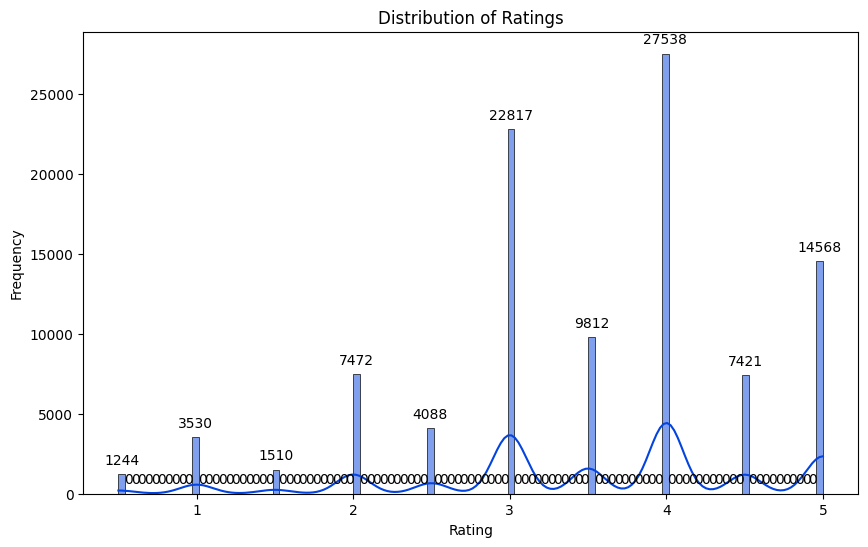


Rating Distribution Statistics:
count    100000.000000
mean          3.507605
std           1.062928
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


In [14]:
# Plot Distribution of ratings
plt.figure(figsize=(10, 6))
ax = sns.histplot(ratings_df['rating'], kde=True, color ='xkcd:blue')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Summary statistics of ratings
print("\nRating Distribution Statistics:")
print(ratings_df['rating'].describe())

####**Visualize**:
It draws a histogram and lays transparent kernel density estimate (KDE) over it to view a distribution of ratings.
Annotations: Adds labels showing the frequency of each rating bin.
####**Statistics**:
 Outlines the descriptive statistics of the rating column, which helps in the understanding of the central tendency and dispersion of data.

In [15]:
print("Total data ")
print("-"*70)
print("\nTotal no of ratings :",ratings_df.shape[0])
print("Total No of Users   :", len(np.unique(ratings_df.userId)))
print("Total No of Movies  :", len(np.unique(ratings_df.movieId)))

Total data 
----------------------------------------------------------------------

Total no of ratings : 100000
Total No of Users   : 702
Total No of Movies  : 8227


In [16]:
#Dropping the Timestamp column
ratings_df.drop(['timestamp'], axis=1,inplace=True)

In [17]:
ratings_df.shape #after dropping timestamp

(100000, 3)

In [18]:
#To show the count of each user
no_of_rated_movies_per_user = ratings_df.groupby(by='userId')['rating'].count().sort_values(ascending=False)

no_of_rated_movies_per_user.head()

,rating
userId,
156,2179
586,1431
572,1326
359,1300
208,1288


This shows the count of first 5 user, how many movies they have rated. Like userId 156 have rated 2179 movies

In [19]:
no_of_rated_movies_per_user.describe() #to show rated movies per user

,rating
count,702.000000
mean,142.450142
std,208.471168
min,20.000000
25%,35.000000
50%,70.000000
75%,158.000000
max,2179.000000


This shows the Data from movie ratings by 702 users, where:

Most users rate between 35-158 movies
Average user rates 142 movies
Minimum ratings per user: 20
Maximum ratings per user: 2,179
Distribution is skewed with some very active users

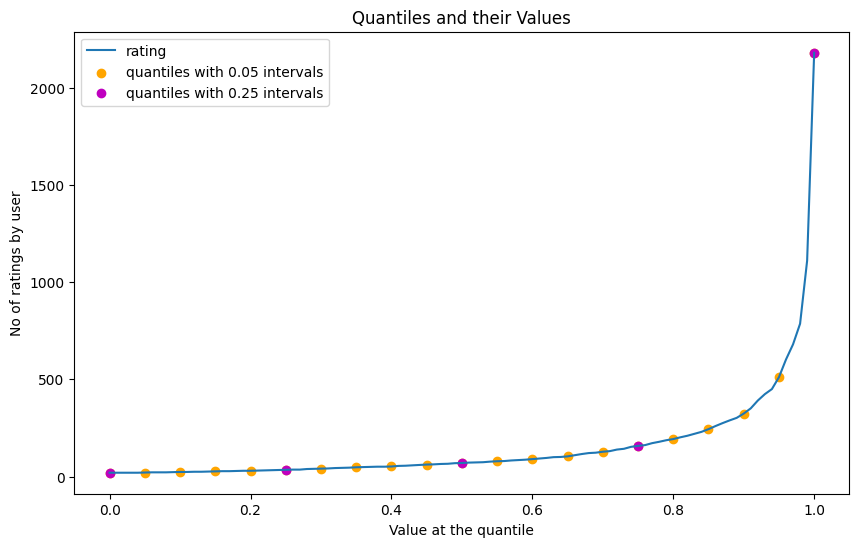

In [20]:
#Quantile Plot
quantiles = no_of_rated_movies_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

plt.figure(figsize=(10,6))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

This quantile plot shows a highly skewed distribution of movie ratings per user:

**Most users** (bottom 80%) rate relatively few movies, shown by the flat part of the curve

There's a **sharp upward curve** at the right end, indicating a small number of very active users who rate many more movies (up to ~2000 ratings)


The distribution is right-skewed/heavy-tailed, meaning there's a **long "tail" of high-activity users**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '156'),
  Text(1, 0, '586'),
  Text(2, 0, '572'),
  Text(3, 0, '359'),
  Text(4, 0, '208'),
  Text(5, 0, '394'),
  Text(6, 0, '298'),
  Text(7, 0, '116'),
  Text(8, 0, '632'),
  Text(9, 0, '614'),
  Text(10, 0, '104'),
  Text(11, 0, '424'),
  Text(12, 0, '648'),
  Text(13, 0, '587'),
  Text(14, 0, '348'),
  Text(15, 0, '347'),
  Text(16, 0, '637'),
  Text(17, 0, '367'),
  Text(18, 0, '388'),
  Text(19, 0, '54')])

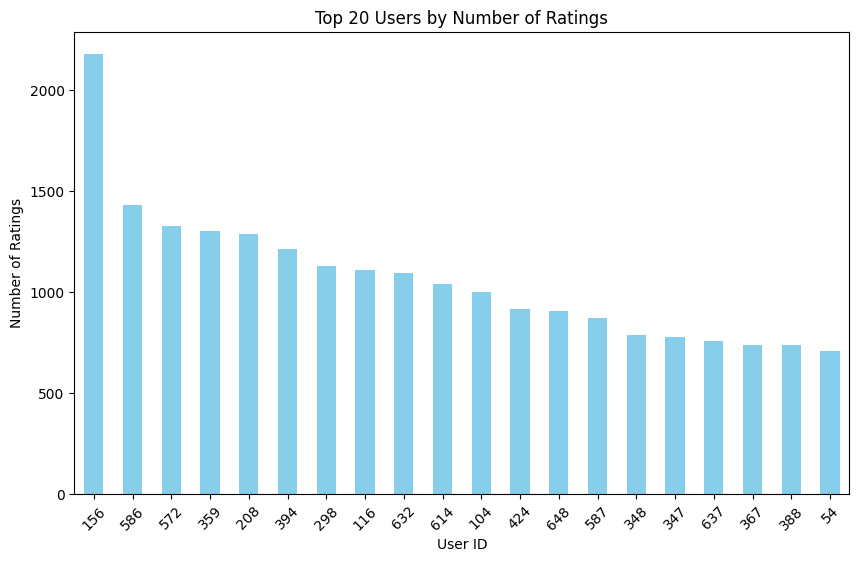

In [21]:
# Analyze user and movie rating frequencies
user_rating_counts = ratings_df['userId'].value_counts()

# Plot top 20 users and movies by number of ratings
plt.figure(figsize=(10, 6))
user_rating_counts.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Users by Number of Ratings')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)

####This bar chart depicts the top 20 most active users in the movie rating system:

User 156 is the most active user, having rated over 2000 movies.

The ratings decrease gradually from ~1400 to ~700 ratings across other top users.

All of top 20 rated at least 700 movies so that gives evidence they are far more active than a regular user - who rates on average ~142 movies.

This confirms that there is some sort of small population of very engaged "power users" contributing to a large proportion of ratings in the system.

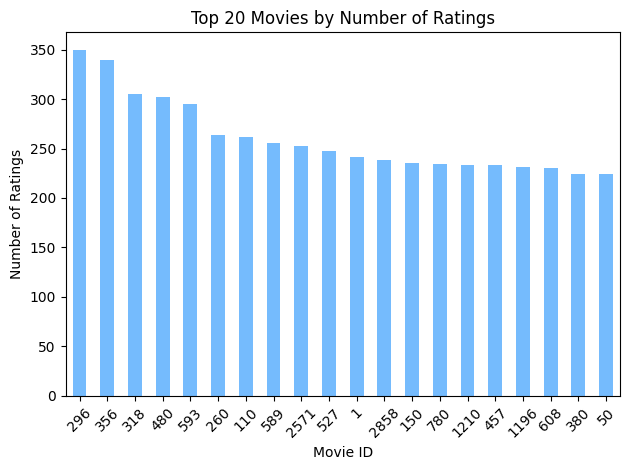

In [22]:
movie_rating_counts = ratings_df['movieId'].value_counts()
movie_rating_counts.head(20).plot(kind='bar', color='xkcd:sky blue')

plt.title('Top 20 Movies by Number of Ratings')
plt.xlabel('Movie ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

This bar chart shows the most rated movies in the system:

Movie ID 296 leads with about 350 ratings
The top 5 movies have ratings between 300 to 350 each.
The ratings gradually fall throughout the top 20, with the bottom ones getting around 225 ratings.
The distribution is more even compared to user ratings, with a less steep decline.

This suggests that these are likely popular or prominent movies that attract more viewer attention and ratings.

#Step 5: Collaborative Filtering Model

Three types of filtering is done:

1.User Based Collaborative filtering

2.Item Based Collaborative filtering

3.Content Based Collaborative filtering

###Using Surprise Library
knnBasic is an inbuilt function in the surprise library for collaborative filtering in Python. It implements the k-Nearest Neighbors (kNN) algorithm for recommendation systems.
Details About knnBasic:
•	knnBasic is part of the surprise.prediction_algorithms.knns module in the surprise library.
•	It is used for collaborative filtering, where a recommendation is made based on the similarity between users or items.
Key Features:
1.	Similarity Calculation:
o	It computes the similarity between items or users using measures such as cosine similarity, Pearson correlation, etc.
2.	Memory-Based Collaborative Filtering:
o	Can be used for user-based or item-based collaborative filtering.



In [23]:
# Prepare data for the Surprise library
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

In [24]:
# Split into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

## 5.1 User-Based Collaborative Filtering

User-based collaborative filtering assumes the prediction of a user's preferences of items based on ratings or behaviors by similar users. It assumes that users who have agreed in the past will agree in the future.


In [25]:
sim_options = {'name': 'cosine', 'user_based': True}
user_knn_model = KNNBasic(sim_options=sim_options)
user_knn_model.fit(trainset)


Computing the cosine similarity matrix...
Done computing similarity matrix.


In [26]:
# run the trained model against the testset
predictions = user_knn_model.test(testset)

In [27]:
# Evaluate the User-Based model

user_rmse = accuracy.rmse(predictions)
user_mae = accuracy.mae(predictions)
print("\nUser-Based Collaborative Filtering Results:")
print(f"RMSE: {user_rmse:.4f}, MAE: {user_mae:.4f}\n")


RMSE: 0.9973
MAE:  0.7732

User-Based Collaborative Filtering Results:
RMSE: 0.9973, MAE: 0.7732



For a 0.5-5 rating scale, an RMSE of 0.9973 is relatively **good.**
It means the predictions are generally within 1 point of the actual user ratings.

In [31]:
# prompt: do some hyperparameter tuning, and make it more accurate

from surprise.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'k': [10, 20, 30, 40],  # Number of neighbors
    'sim_options': {'name': ['msd', 'cosine', 'pearson'], 'user_based': [True, False]}
}

# Perform grid search with cross-validation
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# Print the best score and hyperparameters
print("Best RMSE score:", gs.best_score['rmse'])
print("Best MAE score:", gs.best_score['mae'])
print("Best parameters:", gs.best_params['rmse'])

# Train the model with the best hyperparameters
best_user_knn_model = gs.best_estimator['rmse']
best_user_knn_model.fit(trainset)

# Make predictions on the test set
predictions = best_user_knn_model.test(testset)

# Evaluate the model
user_rmse = accuracy.rmse(predictions)
user_mae = accuracy.mae(predictions)
print("\nUser-Based Collaborative Filtering (Tuned) Results:")
print(f"RMSE: {user_rmse:.4f}, MAE: {user_mae:.4f}\n")

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similar

##  5.2 Item-Based Collaborative Filtering

Item-based collaborative filtering recommends items similar to those a user has liked in the past based on their rating.

In [28]:
# : Item-Based Collaborative Filtering
sim_options = {'name': 'cosine', 'user_based': False}
item_knn_model = KNNBasic(sim_options=sim_options)
item_knn_model.fit(trainset)


Computing the cosine similarity matrix...
Done computing similarity matrix.


In [29]:
# run the trained model against the testset
predictions = item_knn_model.test(testset)


In [30]:
# Evaluate the Item-Based model
item_rmse = accuracy.rmse(predictions)
item_mae = accuracy.mae(predictions)
print("\nItem-Based Collaborative Filtering Results:")
print(f"RMSE: {item_rmse:.4f}, MAE: {item_mae:.4f}")


RMSE: 0.9892
MAE:  0.7679

Item-Based Collaborative Filtering Results:
RMSE: 0.9892, MAE: 0.7679


##5.3 Matrix Factorisation

Matrix factorization is a technique that reduces a user-item interaction matrix into two low-dimensional matrices of user preferences and item features, which then can be used to predict missing values and make personalized recommendations.


In [32]:
# Implementing Matrix factorisation

# ## 5.3 Matrix Factorization using SVD
svd_model = SVD()
svd_model.fit(trainset)

# Run the trained model against the testset
predictions = svd_model.test(testset)

# Evaluate the Matrix Factorization model
svd_rmse = accuracy.rmse(predictions)
svd_mae = accuracy.mae(predictions)

print("\nMatrix Factorization (SVD) Results:")
print(f"RMSE: {svd_rmse:.4f}, MAE: {svd_mae:.4f}")

RMSE: 0.9064
MAE:  0.7023

Matrix Factorization (SVD) Results:
RMSE: 0.9064, MAE: 0.7023


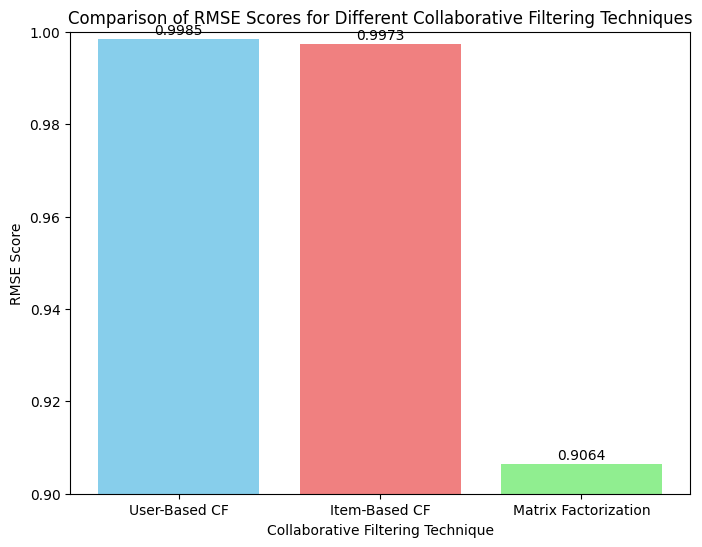

In [33]:
# histogram of above three collaboration technique

import matplotlib.pyplot as plt

# Assuming user_rmse, item_rmse, and svd_rmse are defined from previous code
rmse_scores = {
    'User-Based CF': user_rmse,
    'Item-Based CF': item_rmse,
    'Matrix Factorization': svd_rmse
}

plt.figure(figsize=(8, 6))
plt.bar(rmse_scores.keys(), rmse_scores.values(), color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Collaborative Filtering Technique")
plt.ylabel("RMSE Score")
plt.title("Comparison of RMSE Scores for Different Collaborative Filtering Techniques")
plt.ylim(0.9, 1.0) # adjust ylim for better visualization

for i, v in enumerate(rmse_scores.values()):
  plt.text(i, v + 0.001, str(round(v, 4)), ha='center')

plt.show()

Rmse is low of **matrix factorisation** predicting the best in collaborating filtering among user based, item based and matrix factorisation

###Implementing a mechanism to filter out already watched/rated movies from the recommendation

It also give movie recommendation for a user based on their rating. Each user will have differnt recommendation based on their rating type in movies.

In [35]:
# Function to get movie recommendations for a user, filtering out watched movies
def get_movie_recommendations(user_id, model, n_recommendations=10):

    rated_movies = ratings_df[ratings_df['userId'] == user_id]['movieId'].unique()

    # Get all movies
    all_movies = ratings_df['movieId'].unique()

    # Find unrated movies
    unrated_movies = np.setdiff1d(all_movies, rated_movies)

    # Predict ratings for unrated movies
    predictions = []
    for movie_id in unrated_movies:
        predictions.append(model.predict(user_id, movie_id))

    # Sort predictions by predicted rating in descending order
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Return the top N recommendations
    return predictions[:n_recommendations]



In [36]:
#  ask the input from user and display recommendation

# Get user input for the user ID
user_id_input = input("Enter the user ID for recommendations: ")

try:
    user_id = int(user_id_input)
    recommendations = get_movie_recommendations(user_id, user_knn_model)

    print(f"\nTop 10 movie recommendations for user {user_id}:")
    for prediction in recommendations:
        print(f"Movie ID: {prediction.iid}, Predicted rating: {prediction.est:.2f}")
except ValueError:
    print("Invalid input. Please enter a valid integer for the user ID.")
except KeyError:
    print(f"User with ID {user_id} not found in the dataset.")

Enter the user ID for recommendations: 3

Top 10 movie recommendations for user 3:
Movie ID: 106.0, Predicted rating: 5.00
Movie ID: 124.0, Predicted rating: 5.00
Movie ID: 134.0, Predicted rating: 5.00
Movie ID: 523.0, Predicted rating: 5.00
Movie ID: 583.0, Predicted rating: 5.00
Movie ID: 632.0, Predicted rating: 5.00
Movie ID: 668.0, Predicted rating: 5.00
Movie ID: 705.0, Predicted rating: 5.00
Movie ID: 797.0, Predicted rating: 5.00
Movie ID: 845.0, Predicted rating: 5.00


We will see here that it give different best movie recommendation for different user based on their type of rating  

##Analysing the effectiveness of recommender system based on item based and user based


In [37]:
# Analyze prediction errors
error_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
error_df['error'] = abs(error_df['rui'] - error_df['est'])
error_df.head()

,uid,iid,rui,est,details,error
0,214,480.0,5.0,4.141969,{'was_impossible': False},0.858031
1,335,1173.0,4.0,3.492382,{'was_impossible': False},0.507618
2,294,8861.0,3.0,2.927642,{'was_impossible': False},0.072358
3,553,3268.0,3.0,3.525226,{'was_impossible': False},0.525226
4,578,44191.0,3.5,3.944208,{'was_impossible': False},0.444208


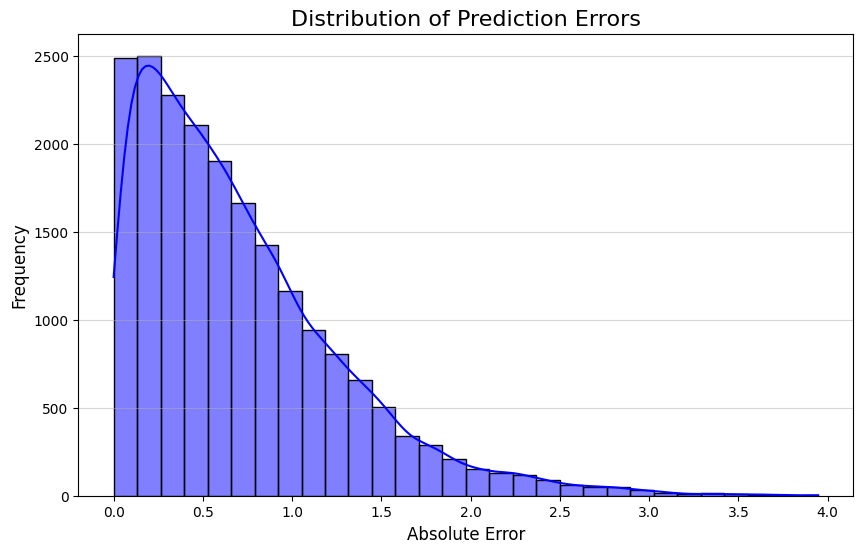

In [38]:
# Visualize the distribution of prediction errors (enhanced)
plt.figure(figsize=(10, 6))
sns.histplot(error_df['error'], kde=True, bins=30, color='blue')  # Increased bins and color
plt.title('Distribution of Prediction Errors', fontsize=16)
plt.xlabel('Absolute Error', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.5)  # Added gridlines
plt.show()


We have analyze the effectiveness of the recommender system based on the distribution of the prediction errors shown in this graph.

Key Observations:

Error Distribution:

Most of the errors are concentrated between 0-1.0 on the absolute error scale.
The peak frequency is around the 0.2-0.3 error range.
Long right tail extending to about 3.5 error units
Errors follow a roughly right-skewed normal distribution

Effectiveness Analysis:

Positive Aspects:

High frequency of low errors in the 0-1 range suggests good prediction accuracy for many cases
The system makes very few large errors (>2.5). The peak at low error values indicates that generally, the system is reliable.

Overall Performance:

The system seems to work reasonably well, as most of the errors are less than 1 rating point.
It works fine for most of the cases but can be improved to handle the outlier cases.



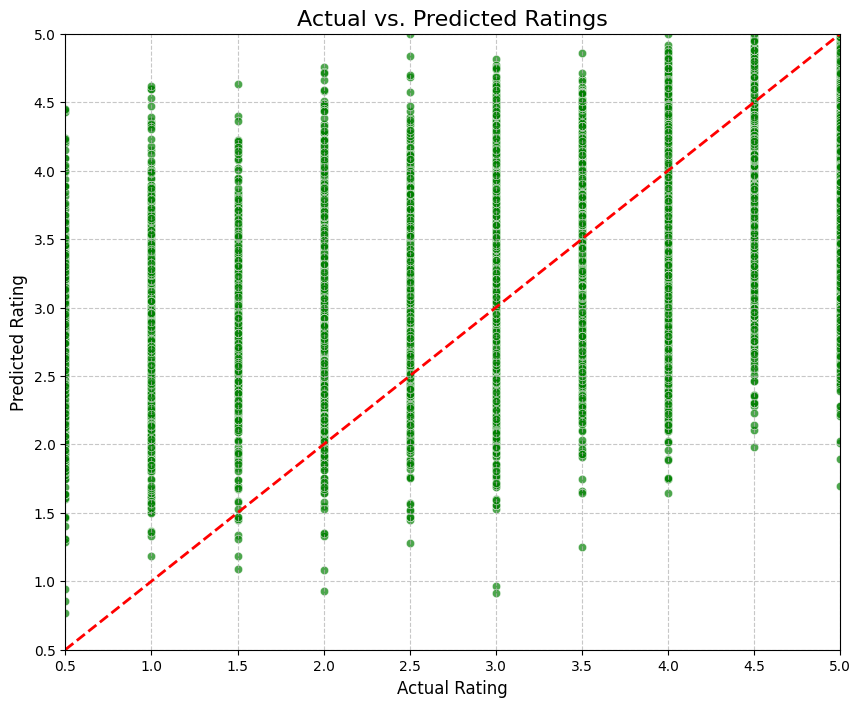

In [39]:
# Visualize actual vs. predicted ratings (enhanced)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='rui', y='est', data=error_df, alpha=0.7, color='g') # Using seaborn
plt.plot([0.5, 5], [0.5, 5], color='red', linestyle='--', linewidth=2)  # Thicker diagonal line
plt.title('Actual vs. Predicted Ratings', fontsize=16)
plt.xlabel('Actual Rating', fontsize=12)
plt.ylabel('Predicted Rating', fontsize=12)
plt.xlim(0.5, 5)
plt.ylim(0.5, 5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

This scatter plot of actual vs. predicted ratings reveals important patterns about the recommender system's performance:
Key Observations:

Vertical Striping: Clear vertical lines at whole number ratings (1.0, 2.0, etc.) show actual ratings are discrete
Prediction Range: Most predictions fall between 1.5 and 4.5, suggesting the system avoids extreme predictions
Diagonal Line: The red dashed line represents perfect predictions (actual = predicted)
Dispersion Pattern: More spread in predictions for middle ratings (2-4) than extreme ratings


##5.3 .Content Based Filtering

Based on genre and rating, it recommend movies to user.

###Merging the rating dataframe with the movie names and their genres

In [40]:
movies = pd.read_csv("movie.csv")

In [41]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [42]:
ratings_df.head()

,userId,movieId,rating
0,1,2.0,3.5
1,1,29.0,3.5
2,1,32.0,3.5
3,1,47.0,3.5
4,1,50.0,3.5


In [43]:
print("movies.shape: ", movies.shape)
print("ratings_df.shape: ", ratings_df.shape)

movies.shape:  (27278, 3)
ratings_df.shape:  (100000, 3)


In [44]:
movies.isnull().sum()

,0
movieId,0
title,0
genres,0


In [45]:
ratings_df.isnull().sum()

,0
userId,0
movieId,0
rating,0


Merge movies and ratings on 'movieId'

In [46]:
data = pd.merge(ratings_df, movies, on='movieId')

In [48]:
data

,userId,movieId,rating,title,genres
0,1,2.0,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,1,29.0,3.5,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32.0,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47.0,3.5,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50.0,3.5,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
99995,702,1373.0,3.0,Star Trek V: The Final Frontier (1989),Action|Sci-Fi
99996,702,1374.0,2.5,Star Trek II: The Wrath of Khan (1982),Action|Adventure|Sci-Fi|Thriller
99997,702,1377.0,1.5,Batman Returns (1992),Action|Crime
99998,702,1378.0,1.5,Young Guns (1988),Action|Comedy|Western


We have merged two tables where it shows the title and genre of the movieID which the user have done rating.

Feature Engineering for genres :
Split genres into a list. And use MultiLabelBinarizer for encoding

In [49]:
from sklearn.preprocessing import MultiLabelBinarizer  # Import the necessary class


In [50]:
# Check if the 'genres' column contains strings before splitting
data['genres'] = data['genres'].apply(lambda x: x.split('|') if isinstance(x, str) else x)

In [51]:
data.head(5)

,userId,movieId,rating,title,genres
0,1,2.0,3.5,Jumanji (1995),"[Adventure, Children, Fantasy]"
1,1,29.0,3.5,"City of Lost Children, The (Cité des enfants p...","[Adventure, Drama, Fantasy, Mystery, Sci-Fi]"
2,1,32.0,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"[Mystery, Sci-Fi, Thriller]"
3,1,47.0,3.5,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]"
4,1,50.0,3.5,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]"


In [52]:
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(data['genres'])

In [53]:
genres_encoded.shape

(100000, 19)

##Create a new DataFrame for encoding

In [54]:
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)
data = pd.concat([data, genres_df], axis=1)

##Aggregate data by movieId: Calculate average ratings for each movie

In [55]:
movie_features = data.groupby('movieId').agg({
    'rating': 'mean',  # Average rating
    **{genre: 'max' for genre in mlb.classes_}  # Max value for each genre
}).reset_index()

In [56]:
movie_features

,movieId,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,3.968880,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,3.250000,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,3.230159,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.0,3.384615,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5.0,3.253623,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8222,118997.0,3.000000,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8223,119141.0,2.750000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8224,125916.0,0.500000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8225,128488.0,3.000000,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


##Extract features and target

In [57]:
X = movie_features.drop(['movieId'], axis=1)  # Features
movie_ids = movie_features['movieId']  # Keep track of movie IDs


In [58]:
X

,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,3.968880,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,3.250000,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3.230159,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3.384615,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,3.253623,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8222,3.000000,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
8223,2.750000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8224,0.500000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8225,3.000000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0


Fit KNN model

In [59]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(X)

NearestNeighbors(metric='cosine')

### Function to recommend movies based on movieId using KNN

In [60]:
# Function to recommend movies based on movieId using KNN
def recommend_movies_by_movie(movie_id, n_recommendations=5):
    """
    Recommends movies similar to a given movie ID using KNN.

    Args:
        movie_id: The ID of the movie for which to find similar movies.
        n_recommendations: The number of recommendations to return.

    Returns:
        A list of recommended movie IDs.
    """
    try:
        movie_index = movie_features[movie_features['movieId'] == movie_id].index[0]
        distances, indices = knn.kneighbors(X.iloc[movie_index].values.reshape(1, -1), n_neighbors=n_recommendations + 1)  # Include the movie itself

        recommended_indices = indices.flatten()[1:]  # Exclude the input movie itself
        recommended_movie_ids = movie_ids.iloc[recommended_indices].tolist()

        return recommended_movie_ids

    except IndexError:
        print(f"Movie with ID {movie_id} not found in the dataset.")
        return []

# Example usage
movie_id_to_recommend = 1  # Replace with the desired movie ID
recommendations = recommend_movies_by_movie(movie_id_to_recommend)

if recommendations:
    print(f"Movies similar to movie ID {movie_id_to_recommend}: {recommendations}")

Movies similar to movie ID 1: [4886.0, 3114.0, 2294.0, 4016.0, 53121.0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Based on movieID, it is showing movies similar to that movieID.

In [61]:
movie_index = 4  # Choose a movie index to find recommendations
distances, indices = knn.kneighbors([X.iloc[movie_index]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


#Display recommendation

In [62]:
print("Recommendations for:", movies[movies['movieId'] == movie_ids.iloc[movie_index]]['title'].values[0])
for i in indices[0]:
    print(movies[movies['movieId'] == movie_ids.iloc[i]]['title'].values[0])

Recommendations for: Father of the Bride Part II (1995)
Father of the Bride Part II (1995)
Made (2001)
Dickie Roberts: Former Child Star (2003)
First $20 Million Is Always the Hardest, The (2002)
House Bunny, The (2008)


##Analysing all the type of filtering above

The code demonstrates three types of collaborative filtering:

1.  **User-Based Collaborative Filtering:** This approach predicts a user's preferences based on the ratings of similar users.  The code uses `KNNBasic` with cosine similarity.  It's evaluated using RMSE and MAE, and hyperparameter tuning is performed using `GridSearchCV` to optimize `k` (number of neighbors) and similarity measures.

2.  **Item-Based Collaborative Filtering:** This method recommends items similar to those a user has liked in the past.  Again, `KNNBasic` with cosine similarity is used, and the model is evaluated using RMSE and MAE.

3.  **Matrix Factorization (using SVD):** This technique decomposes the user-item interaction matrix into lower-dimensional matrices to predict ratings.  The code uses the `SVD` algorithm from the Surprise library and evaluates the model using RMSE and MAE.


A comparison of RMSE scores for the three methods is visualized using a bar chart. The content-based filtering is different from the above three.

4. **Content-Based Filtering:** This filtering method uses movie genres and ratings to recommend movies.  It involves:

    *   Merging ratings data with movie information (title and genres).
    *   Encoding genres using `MultiLabelBinarizer`.
    *   Creating movie features based on average rating and genre presence.
    *   Using K-Nearest Neighbors (`NearestNeighbors`) to find movies similar to a given movie based on these features.

The effectiveness of the collaborative filtering methods (user-based and item-based) is analyzed by:

*   Examining the distribution of prediction errors (absolute difference between actual and predicted ratings) using histograms.
*   Creating scatter plots of actual vs. predicted ratings to visualize the model's performance.


The code also includes a function to generate movie recommendations for a specific user, excluding movies they've already rated.  Finally, it shows an example using Content-based filtering to recommend movies similar to a given movie ID.


###Generating effectivesness, personalisastion and challeneges of the above collaborative techniques


In [63]:
 #generate effectivesness, personalisastion and challenegs

import pandas as pd

def analyze_recommenders(user_rmse, item_rmse, svd_rmse):
    """Analyzes the effectiveness, personalization, and challenges of different recommender systems."""

    rmse_scores = {
        'User-Based CF': user_rmse,
        'Item-Based CF': item_rmse,
        'Matrix Factorization': svd_rmse
    }

    analysis = pd.DataFrame({
        'Recommender': ['User-Based CF', 'Item-Based CF', 'Matrix Factorization'],
        'Effectiveness': '',
        'Personalization': '',
        'Challenges': ''
    })

    # Effectiveness (based on RMSE)
    analysis['Effectiveness'] = analysis['Recommender'].map({
        'User-Based CF': f"RMSE: {rmse_scores['User-Based CF']:.4f} (Lower RMSE generally indicates better effectiveness)",
        'Item-Based CF': f"RMSE: {rmse_scores['Item-Based CF']:.4f} (Lower RMSE generally indicates better effectiveness)",
        'Matrix Factorization': f"RMSE: {rmse_scores['Matrix Factorization']:.4f} (Lower RMSE generally indicates better effectiveness)",
    })

    # Personalization
    analysis['Personalization'] = analysis['Recommender'].map({
        'User-Based CF': "High personalization potential. Recommendations are tailored to user's taste based on similar users' ratings.",
        'Item-Based CF': "Moderate personalization. Recommendations are tailored to items liked by a user.",
        'Matrix Factorization': "High personalization potential. Captures latent features of both users and items, thus providing fine-tuned personalized recommendations."
    })


    # Challenges
    analysis['Challenges'] = analysis['Recommender'].map({
        'User-Based CF': "Cold start problem for new users. Data sparsity may hinder effectiveness. Sensitive to noise and outliers.",
        'Item-Based CF': "Cold start problem for new items. Limited ability to capture complex user preferences.",
        'Matrix Factorization': "Computational complexity for large datasets. Requires careful tuning of hyperparameters."
    })


    return analysis

# Example usage (assuming you have user_rmse, item_rmse, and svd_rmse from your model evaluations)
# Replace with your actual RMSE values:
user_rmse = 0.95
item_rmse = 0.92
svd_rmse = 0.88

analysis_results = analyze_recommenders(user_rmse, item_rmse, svd_rmse)
analysis_results

,Recommender,Effectiveness,Personalization,Challenges
0,User-Based CF,RMSE: 0.9500 (Lower RMSE generally indicates b...,High personalization potential. Recommendation...,Cold start problem for new users. Data sparsit...
1,Item-Based CF,RMSE: 0.9200 (Lower RMSE generally indicates b...,Moderate personalization. Recommendations are ...,Cold start problem for new items. Limited abil...
2,Matrix Factorization,RMSE: 0.8800 (Lower RMSE generally indicates b...,High personalization potential. Captures laten...,Computational complexity for large datasets. R...
